In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics

In [2]:
df=pd.read_csv('WildBlueberryData.csv')

In [3]:
df.head(10)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345453,2825.003738
6,6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214
8,8,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.427977,0.414711,32.334153,4234.868585
9,9,37.5,0.75,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.464366,0.436346,34.849953,5356.871861


In [4]:
df.shape

(777, 18)

In [5]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
    
Total we have 17 columns which are independent variables and 1(yield) is a dependent variable which we have to predict.
Each column has 777 rows which means that dataset is balanced.
Every columns have numerical datatype so encoding is not required.

In [7]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Observations:</font></h3>
   
There are no missing values in the dataset

In [8]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [9]:
df.nunique()

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

In [10]:
# As there are no null values and the datatype of all the columns is float we shall start the preprocessing

## Univariate & Multivariate Analysis

Text(0.5, 0, 'Target Histogram')

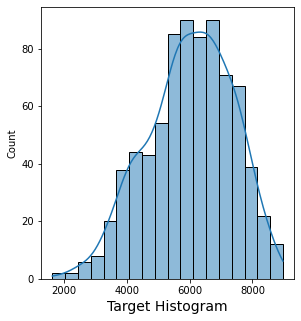

In [11]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
cp = sns.histplot(x=df['yield'], kde=True, palette='Set2')
ax1.set_xlabel('Target Histogram', fontsize=14)

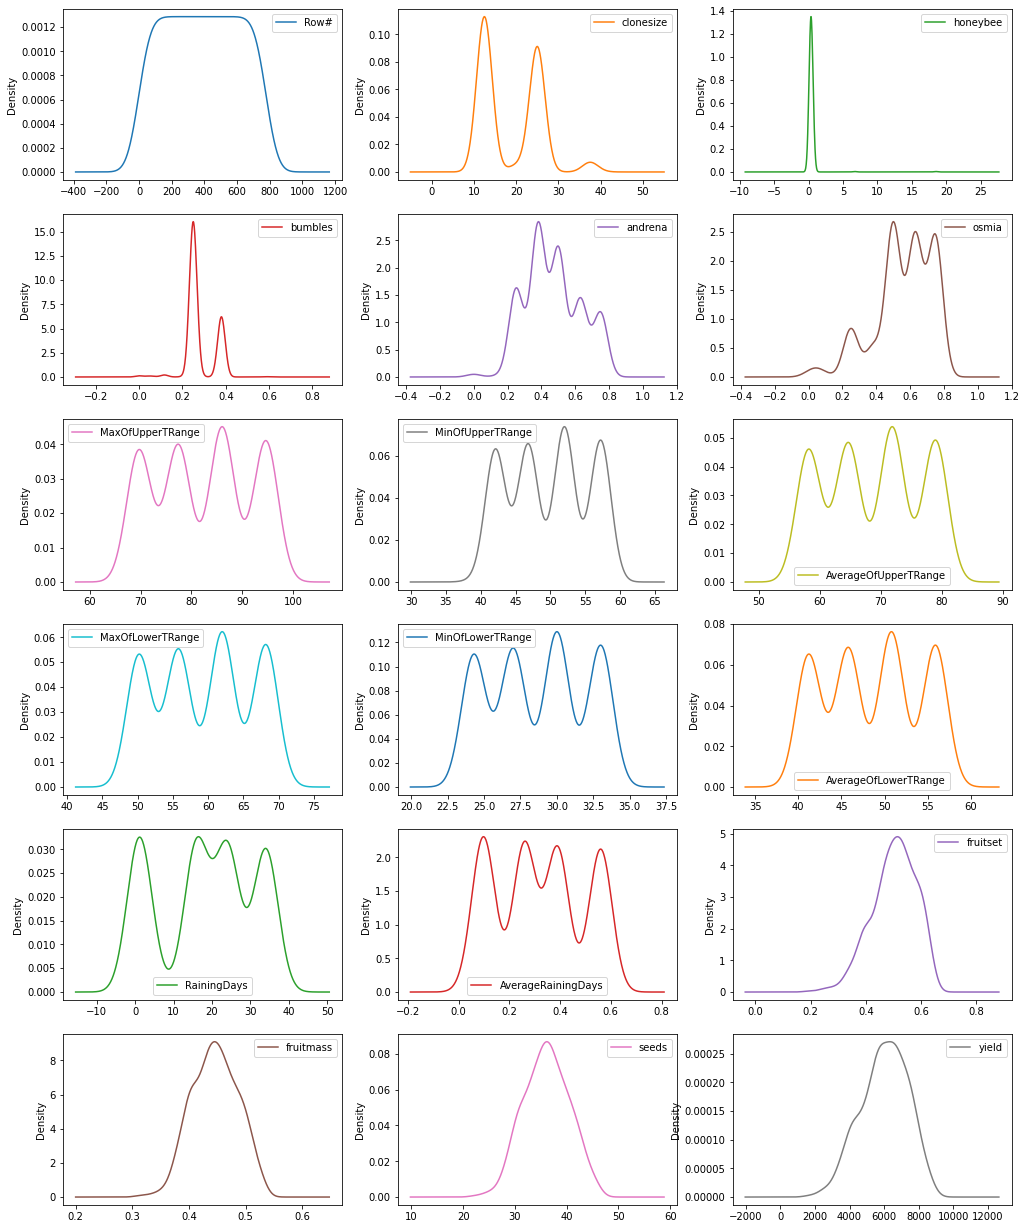

In [12]:
df.plot(kind="density", 
                subplots=True, 
                layout = (6,3), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

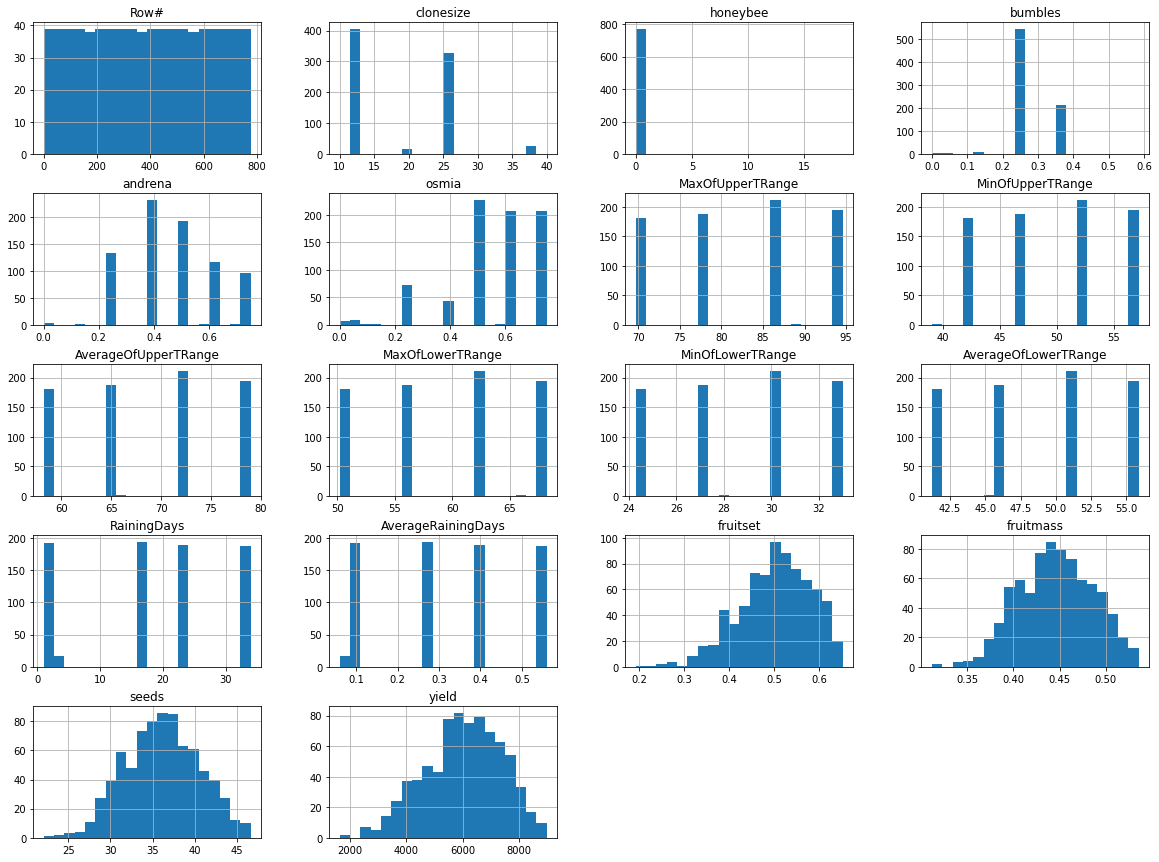

In [13]:
df.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

<AxesSubplot:>

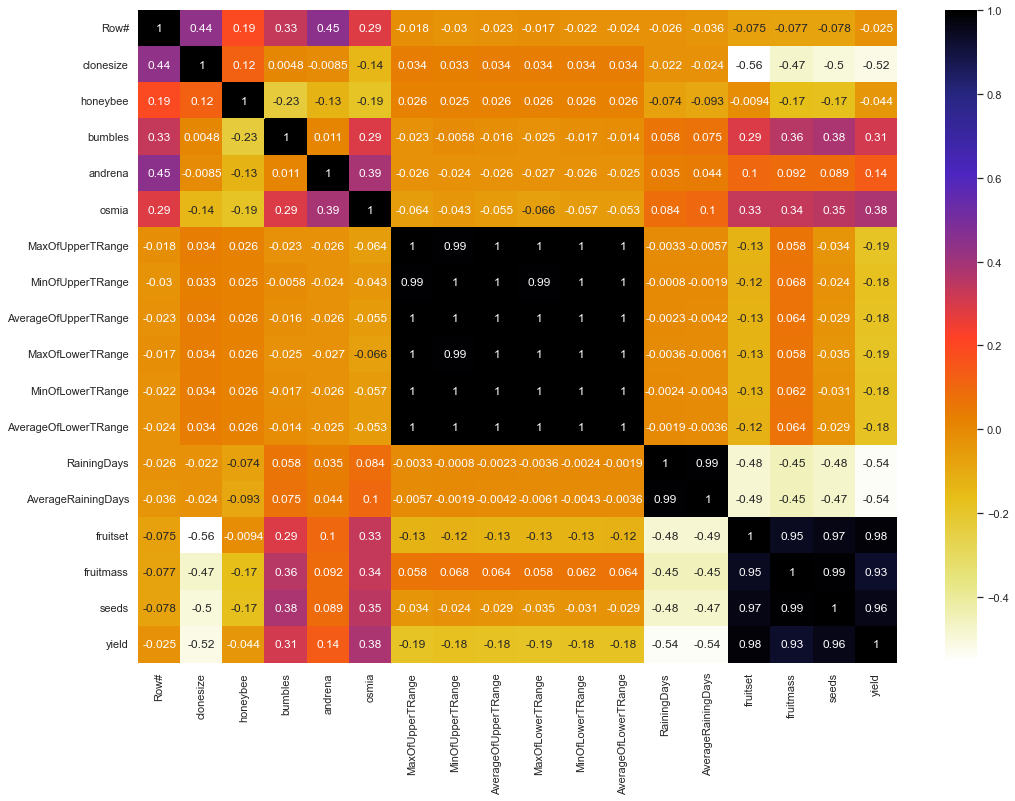

In [14]:
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

## Preprocessing

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">We shall now drop the columns that are unwanted and start the preprocessing of the dataset</div>

In [15]:
df_data_preprocess = df.drop(columns=['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
df_data_preprocess

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [16]:
df_1 = df_data_preprocess.drop(columns=['yield'])
df_2 = df_data_preprocess[['yield']]

In [17]:
df_1

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39
...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">Quantiles are used to analyze and understand the distribution of a variable and can be helpful in various tasks such as outlier detection, data summarization, and feature engineering.</div>

In [18]:
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

clonesize               12.50
bumbles                  0.13
andrena                  0.25
osmia                    0.25
AverageOfUpperTRange     7.20
AverageOfLowerTRange     5.00
AverageRainingDays       0.29
dtype: float64


In [19]:
bbry_data_iqr = df_data_preprocess[~((df_data_preprocess < (Q1 - 1.5 * IQR)) | (df_data_preprocess > (Q3 + 1.5 * IQR))).any(axis=1)]
bbry_data_iqr.shape

(759, 8)

In [20]:
bbry_data_iqr

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26,3813.165795
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10,4947.605663
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26,3866.798965
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10,4303.943030
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
754,25.0,0.38,0.63,0.50,64.7,45.8,0.10,7184.013843
755,25.0,0.38,0.63,0.50,58.2,41.2,0.26,6292.960756
756,25.0,0.38,0.63,0.50,58.2,41.2,0.10,6374.444297
757,25.0,0.38,0.63,0.50,64.7,45.8,0.39,6180.951419


In [21]:
from scipy import stats

In [22]:
z = np.abs(stats.zscore(df_data_preprocess))
print(z.shape)

(777, 8)


In [23]:
bbry_data_zscore = df_data_preprocess[(z < 3).all(axis=1)]
bbry_data_zscore.shape

(767, 8)

In [24]:
df_data_preprocess=bbry_data_zscore
bbry_data_zscore

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
770,20.0,0.293,0.234,0.058,71.9,50.8,0.06,5449.421199
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">As the data seems quite good we shall start with the baseline modeling</div>

## Baseline Modelling

In [25]:
X = df_data_preprocess.drop(["yield"], axis=1)
y = df_data_preprocess['yield']

In [26]:
X.shape

(767, 7)

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Shape of training predictor column data: {X_train.shape}")
print(f"Shape of training target column data: {y_train.shape}")
print(f"Shape of testing predictor column data: {X_test.shape}")
print(f"Shape of testing target column data: {y_test.shape}")

Shape of training predictor column data: (613, 7)
Shape of training target column data: (613,)
Shape of testing predictor column data: (154, 7)
Shape of testing target column data: (154,)


### Linear Regression

In [28]:
X = df_data_preprocess.drop(["yield"], axis=1)
y = df_data_preprocess['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [29]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
# scores(lr_pred,y_test)

In [30]:
mae_lr = mean_absolute_error(y_test, lr_pred)
mse_lr = mean_squared_error(y_test, lr_pred)
rmse_lr = np.sqrt(mse_lr)
rsq_lr = r2_score(y_test, lr_pred)

### XGBoost

In [31]:
xgboost = XGBRegressor()
xgboost.fit(X_train,y_train)
xgPred = xgboost.predict(X_test)
# scores(xgPred,y_test)

In [32]:
mae_xgb = mean_absolute_error(y_test, xgPred)
mse_xgb = mean_squared_error(y_test, xgPred)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, xgPred)

### RandomForest Regression

In [33]:
rf = RandomForestRegressor(max_depth = 15, min_samples_split = 2, criterion = 'mse')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [34]:
mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_xgb)
rsq_rf = r2_score(y_test, y_pred)

In [35]:
y_pred

array([6714.93406817, 7245.38336959, 5632.81316637, 7157.42078424,
       4697.56256809, 4097.66369868, 5297.57709329, 7099.38063407,
       5898.0143119 , 6475.27797924, 5935.46851437, 7522.93280502,
       7472.12689749, 4995.59715506, 8023.05891622, 7786.1147431 ,
       4548.25870156, 5326.54339619, 7395.38901301, 7434.01873764,
       5359.68638683, 4020.82157173, 5942.06828218, 7201.88718768,
       6181.54528528, 5826.62584641, 5985.17448565, 6880.51486899,
       4519.81923264, 5359.29472444, 6323.41048667, 5582.8974151 ,
       6211.65493723, 3681.65288168, 4522.39745045, 3884.48780912,
       4472.5681319 , 6649.02385788, 7781.91249352, 4233.32469412,
       6377.5705376 , 7336.25366453, 2924.12058279, 7566.08845096,
       6382.29141107, 3945.34622471, 4548.25870156, 7683.29303576,
       5662.55775528, 7369.94852551, 5875.31692584, 8303.19327518,
       6474.90973709, 6750.4358125 , 4449.00381316, 6314.32932891,
       5219.1269134 , 7744.72145356, 5534.16787092, 5032.11043

### Model Evaluation

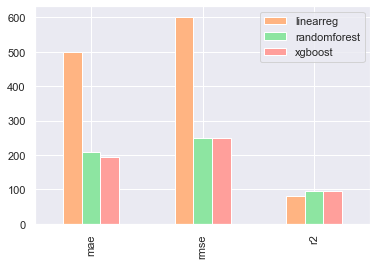

In [36]:
error_rec = {
    "linearreg": {
        "mae": mae_lr,
        "rmse": rmse_lr,
        'r2': rsq_lr*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3], 
                 sns.color_palette("pastel")[4]]);

## Explainable AI

In [37]:
import shap

In [38]:
shap.initjs()

In [39]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X_test)

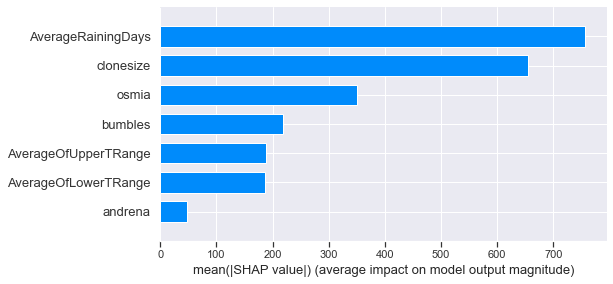

In [40]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

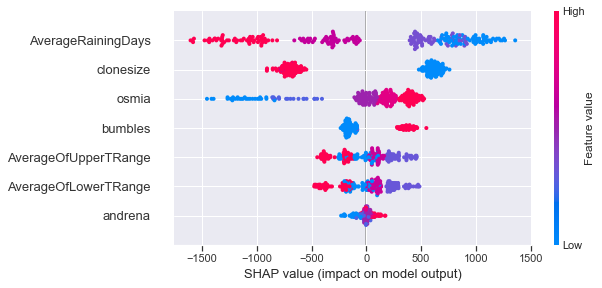

In [41]:
shap.summary_plot(shap_values, X_test)

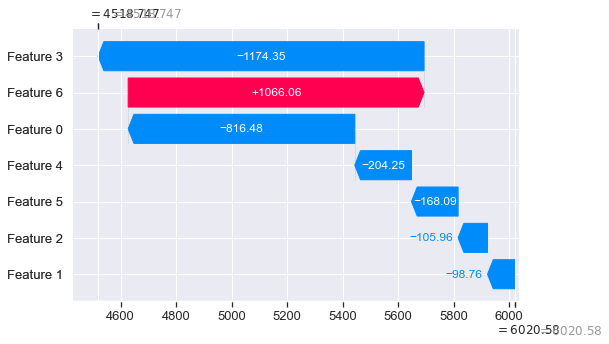

In [42]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], shap_values[row])

## Saving the models

In [43]:
#saving the model
import joblib
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry.joblib'
joblib.dump(rf, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Random Forest tuned model to directory by name: randomforest_blueberry.joblib


In [44]:
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
